In [1]:
import matplotlib.pyplot as plt

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayhamislam","key":"4f2f53a67ca4192be1dba4c678fca088"}'}

In [4]:
! mkdir ~/.kaggle/

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                   480KB  2023-01-04 12:50:31            623         25  1.0              
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022              621KB  2023-01-02 20:10:36            566         25  1.0              
ebrahimelgazar/new-york-city-airbnb-market                      New York City Airbnb Market                    1MB  2023-01-03 13:41:12            414         24  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset              Fifa World Cup 2022: Complete D

In [8]:
! kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [02:38<00:00, 25.6MB/s]
100% 3.58G/3.58G [02:38<00:00, 24.3MB/s]


In [9]:
!unzip fruits-fresh-and-rotten-for-classification

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.21 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.31 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.image as mpimg
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

#1st load imagenet(Transfer learning)

In [11]:
base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [12]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#Freeze base model to not be trained again

In [13]:
base_model.trainable = False

#Adding the new layers to our model

In [14]:
inputs = keras.Input(shape=(224,224,3))


x=base_model(inputs,training=False)

x = keras.layers.GlobalAveragePooling2D()(x)

outputs = keras.layers.Dense(6, activation = 'softmax')(x)

model=keras.Model(inputs,outputs)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 6)                 3078      
                                                                 
Total params: 14,717,766
Trainable params: 3,078
Non-trainable params: 14,714,688
_________________________________________________________________


#Compile the model usind ADAM Optimizer

In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Generate another train data rotated,flipeed, and zoomed in or out from the original data to widely train the model

In [17]:

datagen_train = ImageDataGenerator(
    samplewise_center=True,  
    rotation_range=10, 
    zoom_range=0.1,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=True,
    vertical_flip=True, 
)  

datagen_valid = ImageDataGenerator(samplewise_center=True)

#load the dataset

In [18]:
train_data = datagen_train.flow_from_directory(
    "/content/dataset/dataset/train",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=8,
)

valid_data = datagen_valid.flow_from_directory(
    "/content/dataset/dataset/test",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=8,
)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [19]:
{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}
[ ]


[]

In [20]:
def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

Get some Images form the dataset to be sure it's Loaded Correctly

(408, 568, 3)


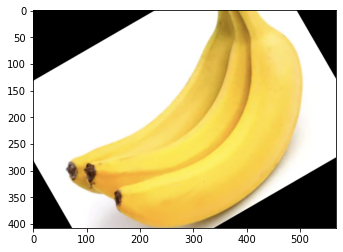

In [21]:
show_image('/content/dataset/dataset/test/freshbanana/rotated_by_30_Screen Shot 2018-06-12 at 10.01.37 PM.png')

(336, 354, 3)


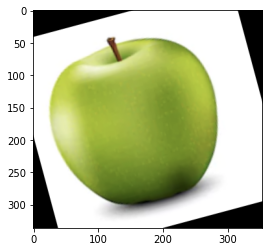

In [22]:
show_image('/content/dataset/train/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.04.16 PM.png')

(344, 368, 3)


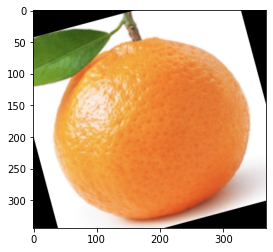

In [23]:
show_image('/content/dataset/train/freshoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.53.53 PM.png')

(354, 306, 3)


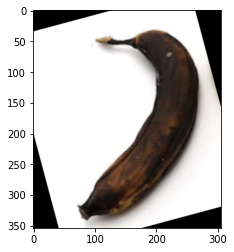

In [24]:
show_image('/content/dataset/train/rottenbanana/rotated_by_15_Screen Shot 2018-06-12 at 8.50.04 PM.png')

(230, 250, 3)


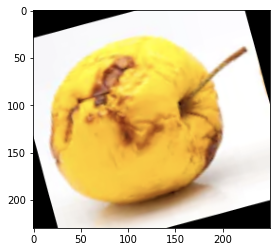

In [25]:
show_image('/content/dataset/train/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.35.38 PM.png')

(384, 354, 3)


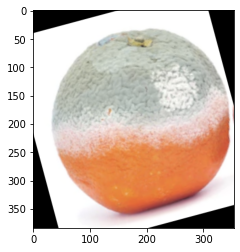

In [26]:
show_image('/content/dataset/train/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.18.34 PM.png')

#Train our model for 10 EPOCHS

In [27]:
history = model.fit(train_data,
validation_data=valid_data,
steps_per_epoch = train_data.samples/train_data.batch_size, 
validation_steps = valid_data.samples/valid_data.batch_size, 
epochs =10)          


Epoch 1/10
1362/1362 [==============================] - 207s 146ms/step - loss: 0.4599 - accuracy: 0.8711 - val_loss: 0.1440 - val_accuracy: 0.9559
Epoch 2/10
1362/1362 [==============================] - 197s 145ms/step - loss: 0.1310 - accuracy: 0.9571 - val_loss: 0.1716 - val_accuracy: 0.9470
Epoch 3/10
1362/1362 [==============================] - 193s 141ms/step - loss: 0.0999 - accuracy: 0.9682 - val_loss: 0.1035 - val_accuracy: 0.9715
Epoch 4/10
1362/1362 [==============================] - 193s 142ms/step - loss: 0.0791 - accuracy: 0.9721 - val_loss: 0.1153 - val_accuracy: 0.9703
Epoch 5/10
1362/1362 [==============================] - 192s 141ms/step - loss: 0.0665 - accuracy: 0.9781 - val_loss: 0.0715 - val_accuracy: 0.9766
Epoch 6/10
1362/1362 [==============================] - 192s 141ms/step - loss: 0.0762 - accuracy: 0.9730 - val_loss: 0.0881 - val_accuracy: 0.9759
Epoch 7/10
1362/1362 [==============================] - 194s 142ms/step - loss: 0.0668 - accuracy: 0.9789 - val_

In [28]:
def pipe_line(image_path): 
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    final_pred = classes[np.argmax(preds)]
    return final_pred

In [29]:
classes = train_data.class_indices
classes = {indx: c for c, indx in classes.items()}

(332, 518, 4)
1/1 [==============================] - 1s 847ms/step


'freshbanana'

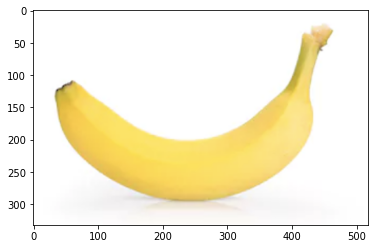

In [30]:
path = '/content/dataset/dataset/test/freshbanana/Screen Shot 2018-06-12 at 10.00.37 PM.png'
pipe_line(path)

(396, 582, 3)
1/1 [==============================] - 0s 17ms/step


'rottenbanana'

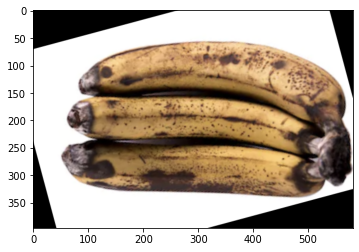

In [31]:
path = '/content/dataset/dataset/test/rottenbanana/rotated_by_15_Screen Shot 2018-06-12 at 8.51.46 PM.png'
pipe_line(path)

(438, 450, 3)
1/1 [==============================] - 0s 19ms/step


'rottenoranges'

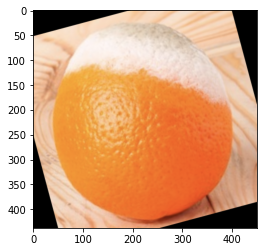

In [32]:
path = '/content/dataset/dataset/test/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.31.48 PM.png'
pipe_line(path)

(218, 224, 3)
1/1 [==============================] - 0s 18ms/step


'rottenapples'

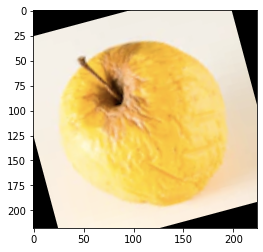

In [33]:
path = '/content/dataset/dataset/test/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.45.09 PM.png'
pipe_line(path)

#A function to say if the fruits is fresh or rotten (Apples Oranges Bananas + test the models on other species)

In [71]:
def rotten_or_fresh(image_path):
    if  pipe_line(image_path)  == 3 or 4 or 5:
        print("Its Rotten!, NO  dont eat, I wont recommend!")
    else:
        if  pipe_line(image_path)  == 0 or 1 or 2:
            print("It's Fresh ,Say BESM ALLAH and eat it!")

(218, 224, 3)
1/1 [==============================] - 0s 17ms/step
Its Rotten!, NO  dont eat, I wont recommend!


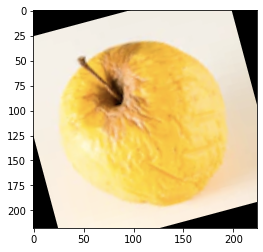

In [72]:
path = '/content/dataset/dataset/test/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.45.09 PM.png'
rotten_or_fresh(path)


(438, 450, 3)
1/1 [==============================] - 0s 17ms/step
Its Rotten!, NO  dont eat, I wont recommend!


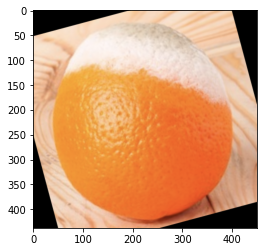

In [73]:
path = '/content/dataset/dataset/test/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.31.48 PM.png'
rotten_or_fresh(path)

#Test the model after Training on new photos never used in training and testing in prediction photos folder

(218, 224, 3)
1/1 [==============================] - 0s 18ms/step


'rottenapples'

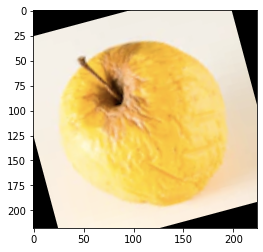

In [42]:
path = '/content/dataset/dataset/test/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.45.09 PM.png'
pipe_line(path)

In [43]:
model.evaluate(valid_data)

338/338 [==============================] - 19s 55ms/step - loss: 0.0688 - accuracy: 0.9863


[0.06882171332836151, 0.9862861633300781]

(408, 612, 3)
1/1 [==============================] - 0s 18ms/step


'rottenapples'

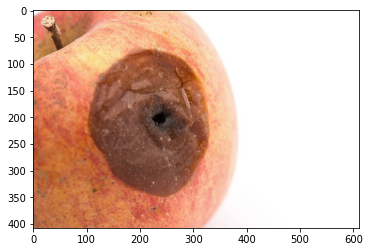

In [47]:
path = '/content/dataset/dataset/prediction photos/istockphoto-488669475-612x612.jpg'
pipe_line(path)

(5000, 5000, 4)
1/1 [==============================] - 0s 32ms/step


'freshoranges'

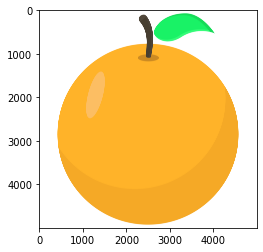

In [49]:
path = '/content/dataset/dataset/prediction photos/—Pngtree—vector round orange fruit_8434430.png'
pipe_line(path)

(554, 612, 3)
1/1 [==============================] - 0s 17ms/step


'rottenapples'

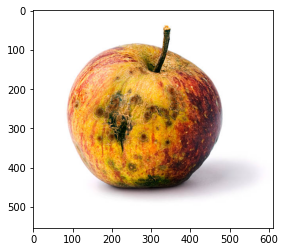

In [50]:
path = '/content/dataset/dataset/prediction photos/istockphoto-157309232-612x612.jpg'
pipe_line(path)

(612, 408, 3)
1/1 [==============================] - 0s 18ms/step


'rottenoranges'

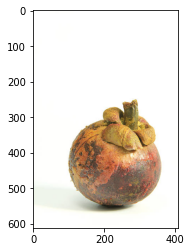

In [51]:
path = '/content/dataset/dataset/prediction photos/istockphoto-457038703-612x612.jpg'
pipe_line(path)

(408, 612, 3)
1/1 [==============================] - 0s 17ms/step


'rottenapples'

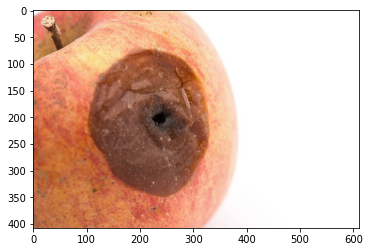

In [53]:
path = '/content/dataset/dataset/prediction photos/istockphoto-488669475-612x612.jpg'
pipe_line(path)

(554, 612, 3)
1/1 [==============================] - 0s 17ms/step
Its Rotten!, NO  dont eat, I wont recommend!


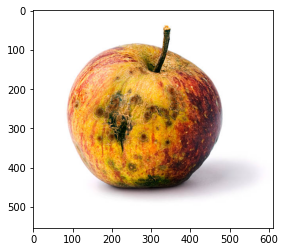

In [55]:
path = '/content/dataset/dataset/prediction photos/istockphoto-157309232-612x612.jpg'
rotten_or_fresh(path)

(1280, 1262, 3)
1/1 [==============================] - 0s 19ms/step


'rottenoranges'

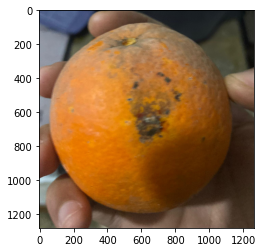

In [76]:
path = '/content/dataset/dataset/prediction photos/WhatsApp Image 2023-01-10 at 12.48.19 AM (2).jpeg'
pipe_line(path)

(1280, 1242, 3)
1/1 [==============================] - 0s 16ms/step


'rottenoranges'

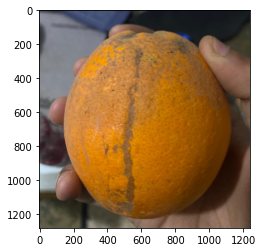

In [78]:
path = '/content/dataset/dataset/prediction photos/WhatsApp Image 2023-01-10 at 12.48.19 AM.jpeg'
pipe_line(path)

(1280, 1242, 3)
1/1 [==============================] - 0s 17ms/step


'rottenoranges'

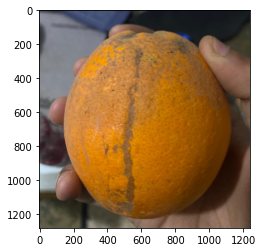

In [81]:
path = '/content/dataset/dataset/prediction photos/WhatsApp Image 2023-01-10 at 12.48.19 AM.jpeg'
pipe_line(path)

(1600, 1340, 3)
1/1 [==============================] - 0s 19ms/step


'freshoranges'

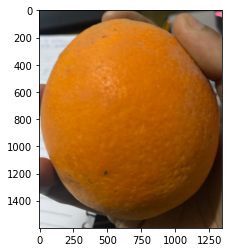

In [79]:
path = '/content/dataset/dataset/prediction photos/WhatsApp Image 2023-01-10 at 1.12.28 AM.jpeg'
pipe_line(path)

(438, 450, 3)
1/1 [==============================] - 0s 17ms/step
Its Rotten!, NO  dont eat, I wont recommend!


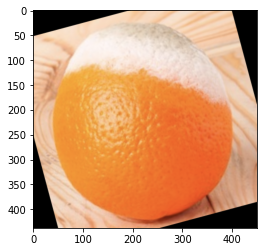

In [82]:
path = '/content/dataset/dataset/test/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.31.48 PM.png'
rotten_or_fresh(path)

#Save the Model

In [83]:
model.save('model')